# Ember electricity database

Barış Sanlı, barissanli2@gmail.com

Ember has an excellent database for monthly electricity data
This book has two sections
#### 1. Exploring the database
#### 2. Interactive widget based plotting

In [ ]:
# Ana web sitesi: https://ember-climate.org/data-catalogue/monthly-electricity-data/
# veri adresi yıl ve aylara göre değişiyor /YIL/AY/
# https://ember-climate.org/app/uploads/2022/07/monthly_full_release_long_format.csv

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import requests 
from urllib.request import urlopen

link="https://ember-climate.org/app/uploads/2022/07/monthly_full_release_long_format.csv"


# orjinal kod : https://stackoverflow.com/questions/65020294/downloading-a-zipped-file-using-python-3-7

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

            
#ilk sefer indir, ikinci çalışmada tekrar tekrar indirmeye gerek kalmasın
download_url(link,"./ember.csv")

In [ ]:
df = pd.read_csv('ember.csv')
#df = pd.read_csv(link)

In [ ]:
df.columns

Index(['Area', 'Country code', 'Date', 'Area type', 'Continent',
       'Ember region', 'EU', 'OECD', 'G20', 'G7', 'Category', 'Subcategory',
       'Variable', 'Unit', 'Value', 'YoY absolute change', 'YoY % change'],
      dtype='object')

In [ ]:
df.Area.unique()

array(['Argentina', 'Armenia', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Burundi', 'Canada', 'Chile', 'China',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'EU', 'Europe', 'Finland',
       'France', 'G20', 'G7', 'Georgia', 'Germany', 'Greece', 'Hungary',
       'India', 'Ireland', 'Italy', 'Japan', 'Kenya', 'Kosovo',
       'Latin America and Caribbean', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro',
       'Netherlands', 'New Zealand', 'North America', 'North Macedonia',
       'Norway', 'OECD', 'Pakistan', 'Peru', 'Philippines (the)',
       'Poland', 'Portugal', 'Romania', 'Russian Federation (the)',
       'Senegal', 'Serbia', 'Singapore', 'Slovakia', 'Slovenia',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Tajikistan', 'Thaila

In [ ]:
df.Variable.unique()

array(['Demand', 'Clean', 'Fossil', 'Gas and Other Fossil',
       'Hydro, Bioenergy and Other Renewables', 'Renewables',
       'Wind and Solar', 'Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
       'Other Fossil', 'Solar', 'Wind', 'Total Generation', 'Net Imports',
       'CO2 intensity', 'Total emissions', 'Other Renewables',
       'Day-ahead electricity price'], dtype=object)

In [ ]:
ulke=df[(df.Area=='Turkey') & (df.Variable=='Demand')]

In [ ]:
plt.rcParams["figure.figsize"]=[12.0,6.0]

Text(0, 0.5, 'TWh')

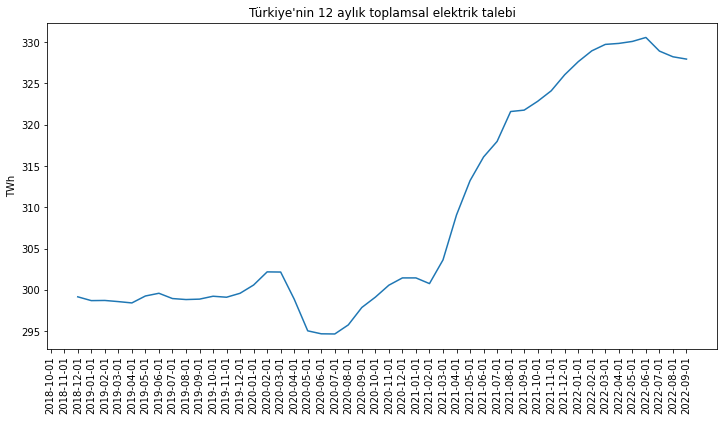

In [ ]:
plt.xticks(rotation=90)
plt.plot(ulke.Date, ulke.Value.rolling(12).sum())
plt.title("Türkiye'nin 12 aylık toplamsal elektrik talebi")
plt.ylabel("TWh")

In [ ]:
ulke[["Date","Value"]].tail(3)

,Date,Value
309098,2022-07-01,28.71
309148,2022-08-01,31.50
309198,2022-09-01,27.06


# 2. Interactive Plotting

In this part we create an interactive plot

Dropdown(description='Country selection:', index=77, options=('Argentina', 'Armenia', 'Asia', 'Australia', 'Au…

Dropdown(description='Graph selection:', index=2, options=('Demand', 'Clean', 'Fossil', 'Gas and Other Fossil'…

Dropdown(description='Unit selection:', index=1, options=('TWh', '%', 'mtCO2', 'gCO2/kWh', 'EUR/MWh'), value='…

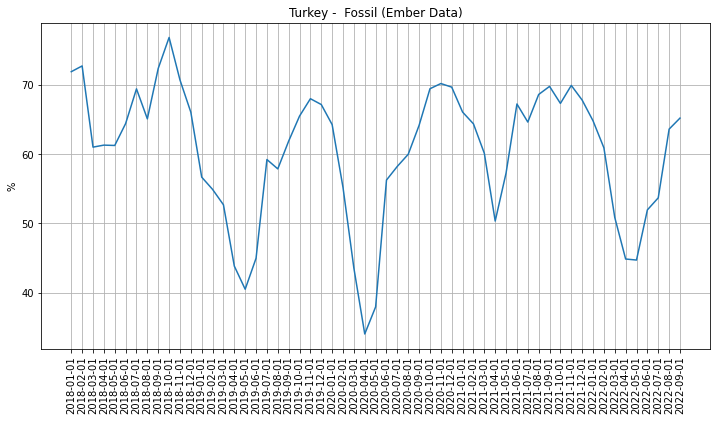

In [ ]:
from traitlets.traitlets import default
from IPython.display import display, clear_output
from ipywidgets import Dropdown

def dropdown_eventhandler(change):
  clear_output()
  dataset= df[(df.Area==dropdown.value) & (df.Variable==dropdown2.value) & (df.Unit==dropdown3.value)]
  plt.xticks(rotation=90)
  plt.plot(dataset.Date, dataset.Value)
  plt.title(dropdown.value + " -  "+dropdown2.value+" (Ember Data)")
  plt.ylabel(dropdown3.value)
  plt.grid("on")
  display(dropdown,dropdown2,dropdown3)


dropdown = Dropdown(description="Country selection:", options=df.Area.unique(),value="Turkey")
dropdown2 = Dropdown(description="Graph selection:", options=df.Variable.unique(),value="Demand")
dropdown3 = Dropdown(description="Unit selection:", options=df.Unit.unique(),value="TWh")


dropdown.observe(dropdown_eventhandler, names='value')
dropdown2.observe(dropdown_eventhandler, names='value')
dropdown3.observe(dropdown_eventhandler, names='value')


clear_output()
display(dropdown,dropdown2,dropdown3)